# Chapter 8: Cryo-Electron Microscopy

Excursion: Single Particle Reconstruction in Cryo-Electron Microscopy

# Problem 8.1 - 1D, Alignment via Correlation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 84.5, 84.5, -0.5)

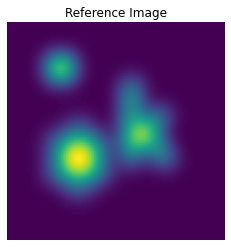

In [3]:
# Bringing the Reference Image data into the program using plt.imread and reshaping data to plot using plt.imshow
ref_im = plt.imread('test2Dblur.tif')
ref_im.shape
ref_im.dtype
ref_im[:10,:10]

# Plotting the reference image being used
plt.figure('Reference Image')
plt.title('Reference Image')
plt.imshow(ref_im)
plt.axis('off')

In [5]:
# Loading the 1dImages.npz file containing the variables shown below:
file = np.load('1dImages.npz')
file.files

# 1dImages.npz: contains variables:
#  noiselevels = array containing 1/sqrt(SNR) for each of 3 simulated datasets
#  shiftSD = how many pixels to jitter the fake data
#  samples = 3D array containing simulated images
#	 samples[i,j,k] where i=which image, j = position in image, k = which noiselevel

['samples', 'noiselevels', 'shiftSD']

In [6]:
# Splitting the .npz file, I was able to pull out the following variables:
samples = file['samples']
print("Samples = {} \n".format(samples))

noise = file['noiselevels']
print('Noise Levels = {} \n'.format(noise))

shift = file['shiftSD']
print('ShiftSD = {}'.format(shift))

Samples = [[[-0.34891339 -0.1744567  -0.04361418]
  [ 1.23325128  0.61662566  0.15415645]
  [-3.9701316  -1.98506588 -0.49626659]
  ...
  [-1.44030302 -0.72015155 -0.18003794]
  [-2.17315362 -1.0865768  -0.27164418]
  [ 0.6120713   0.30603565  0.07650891]]

 [[ 0.30164451  0.02627636 -0.18024976]
  [-1.39606299 -0.66465952 -0.11610692]
  [-1.00119849 -0.50954124 -0.1407983 ]
  ...
  [-0.44178586 -0.22089293 -0.05522323]
  [-0.4198908  -0.2099454  -0.05248635]
  [ 3.64324674  1.82162337  0.45540584]]

 [[ 1.04237307  1.55845213  1.94551143]
  [ 3.56336813  3.13312725  2.81044659]
  [ 0.34124124  1.45237727  2.2857293 ]
  ...
  [-3.36869882 -1.68434941 -0.42108735]
  [ 0.17679862  0.08839931  0.02209983]
  [-0.75173389 -0.37586694 -0.09396674]]

 ...

 [[ 2.48715621  1.24376507  0.31122171]
  [-0.43520711 -0.21830131 -0.05562195]
  [ 0.04489534  0.02505171  0.01016899]
  ...
  [ 2.70927792  1.35463896  0.33865974]
  [-0.19784718 -0.09892359 -0.0247309 ]
  [ 0.58714063  0.29357031  0.0733

In [71]:
#------------------------------------------------------------------------------------------------------
# The Following code was used during my initial investigation into the dataset, this may be inaccurate.
#------------------------------------------------------------------------------------------------------

# Splicing the 'samples' variable array into their i,j,k sub-variables when,
#   {samples[i,j,k] where i=which image, j = position in image, k = which noiselevel}
i = samples[:,0] # Which Image 
j = samples[:,1] # Position in Image
k = samples[:,2] # Which Noise Level
#print('Which Image = \n',i, '\n\n')
#print('Position in Image = \n',j, '\n\n')
#print('Which Noise Level = \n',k, '\n\n')

# Pulling out the data set for each noise level
# Which Image
lsample_i = i[:,0] # large noise sample size = 2
msample_i = i[:,1] # Medium noise sample size = 1
ssample_i = i[:,2] # Small noise sample size = 0.25
#print('Which Image: \n',ssample_i,'\n\n',msample_i,'\n\n', lsample_i,'\n\n')

# Position of Image
lsample_j = j[:,0]
msample_j = j[:,1]
ssample_j = j[:,2]
#print('Position in Image: \n',ssample_j,'\n\n',msample_j,'\n\n', lsample_j,'\n\n')

# Which Noise Level
lsample_k = k[:,0]
msample_k = k[:,1]
ssample_k = k[:,2]
#print('Which Noise Level: \n',ssample_k,'\n\n',msample_k,'\n\n', lsample_k,'\n\n')

# For the lowest noise level, find the naive average of each pixel over samples and call it "Template"
min_noise = np.min(noise)
#print(min_noise)

N = np.size(ssample_i)
n = np.arange(1,N+1)
n_ave = ssample_i.cumsum()/n
#print(n)

# Ploting what I believe is the naive average over the size of the array
#plt.figure()
#plt.plot(n,n_ave, 'b-');
#plt.plot(np.cumsum(np.ones(np.size(i[:,2]))), i[:,2], 'b.');

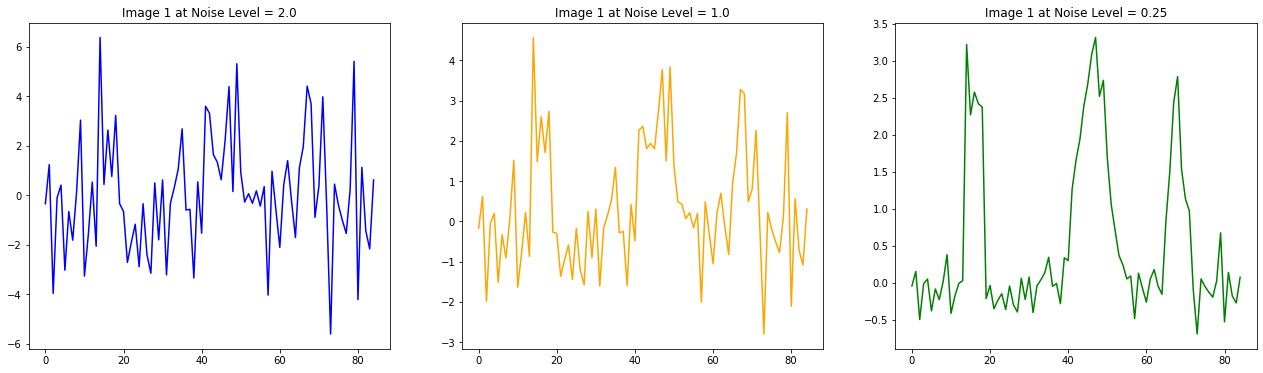

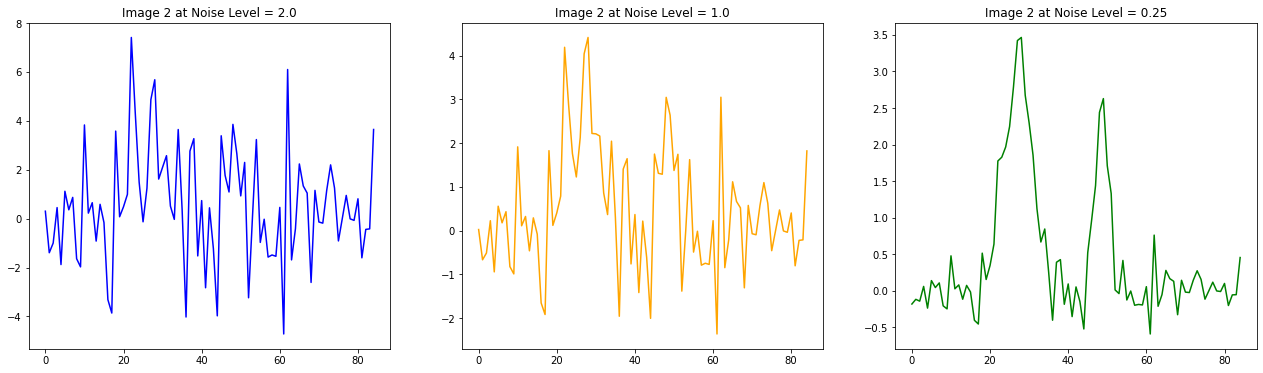

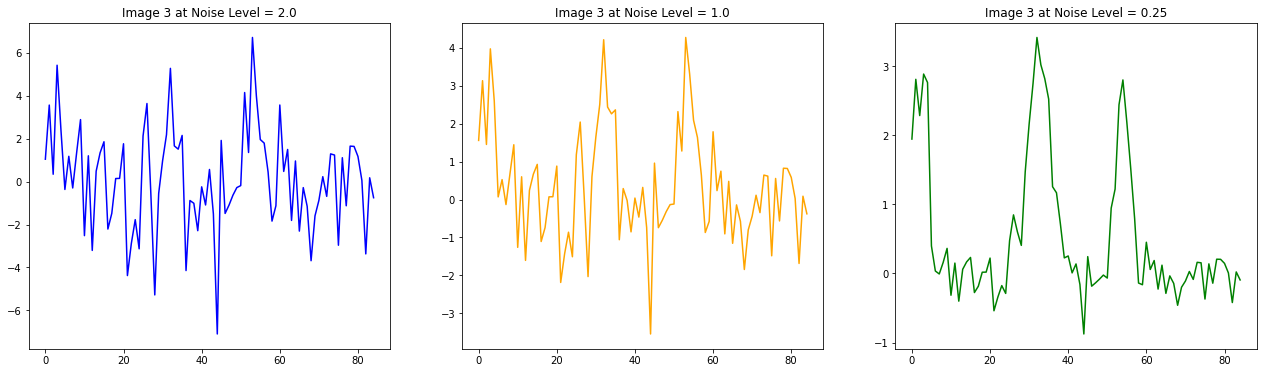

In [124]:
# After recieving help from Dr. Kinder
# Displaying the 3 images at each respective noise level that exist in the variable array 'samples'

for x in range(3):
    plt.figure('Image {}'.format(x+1), figsize=(22,6))
    for i in range(1):
        plt.subplot(1,3,1)
        plt.plot(samples[x,:,0], color='blue')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[0]))
        plt.subplot(1,3,2)
        plt.plot(samples[x,:,1], color='orange')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[1]))
        plt.subplot(1,3,3)
        plt.plot(samples[x,:,2], color='green')
        plt.title('Image {} at Noise Level = {}'.format(x+1,noise[2]))
              

In [91]:
# Therefore, analysing the first image
larges1 = samples[0,:,0] # Analysing the first image, first noise level (=2)
meds1 = samples[0,:,1]   # Analysing the first image, second noise level (=1)
smalls1 = samples[0,:,2] # Analysing the first image, third noise level (=0.25)

# Therefore, analysing the second image
larges2 = samples[1,:,0]
meds2 = samples[1,:,1]
smalls2 = samples[1,:,2]

# Therefore, analysing the third image
larges3 = samples[2,:,0]
meds3 = samples[2,:,1]
smalls3 = samples[2,:,2]

[-0.04361418  0.15415645 -0.49626659 -0.01356858  0.05041187 -0.37907184
 -0.08305584 -0.22757675  0.01788346  0.37987047 -0.41386821 -0.17926662
 -0.00865452  0.02801216  3.22208662  2.27121515  2.57839092  2.42268454
  2.37563916 -0.2131611  -0.03670767 -0.35176518 -0.23507259 -0.14797974
 -0.36146899 -0.04353694 -0.30040729 -0.39430595  0.06154014 -0.22569804
  0.07667395 -0.40249454 -0.04134924  0.04009069  0.13511857  0.34513828
 -0.04827928 -0.00819061 -0.28152983  0.33815429  0.29934336  1.26538371
  1.65743159  1.94141215  2.39070952  2.68770468  3.08362889  3.31705792
  2.52110273  2.73800946  1.69240421  1.06272688  0.70803409  0.36894249
  0.24181583  0.05261294  0.09151538 -0.48485093  0.12823024 -0.07159188
 -0.26266647  0.05079927  0.17804056 -0.04433005 -0.15568129  0.83092881
  1.50322199  2.43895255  2.78881457  1.53781375  1.13516949  0.97351961
 -0.09430177 -0.69191418  0.05293605 -0.049766   -0.12697738 -0.19357087
  0.02873009  0.6755335  -0.52756945  0.14049322 -0

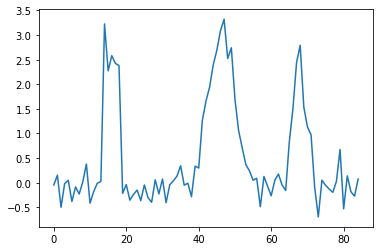

In [125]:
# For the lowest noise level, find the naive average of each pixel over samples
# (first column, bottom row of Figure 8.5 on Page 211 of the textbook)
template1s = smalls1
print(template1s)
plt.figure()
plt.plot(template1s)